<h1 style="font-size: 1.6rem; font-weight: bold">ITO 5047: Fundamentals of Artificial Intelligence</h1>
<h1 style="font-size: 1.6rem; font-weight: bold">Tutorial 4 - Decision Trees</h1>
<p style="margin-top: 5px; margin-bottom: 5px;">Monash University Australia</p>
<p style="margin-top: 5px; margin-bottom: 5px;">Jupyter Notebook by: Tristan Sim Yook Min</p>

---

### **1) Decision Tree**

Consider the following data that deals with playing ball in different weather conditions (it’s a reduced version of what we saw in the topic book videos). The data has been sorted in descending order based on the temperature attribute. All attributes are categorical other than Temperature.

In this question, we will see an approach incorporating continuous attributes into the decision tree algorithm. We need to define a split point p of the continuous attribute so the data is split into attributes ≤ p and > p.

| Outlook   | Temperature | Humidity | Play Ball |
|-----------|-------------|----------|-----------|
| Sunny     | 30          | High     | No        |
| Rain      | 22          | High     | No        |
| Sunny     | 20          | Normal   | Yes       |
| Overcast  | 18          | High     | Yes       |
| Overcast  | 9           | Normal   | Yes       |
| Rain      | 6           | Normal   | No        |

With this, the continuous attribute can be turned into a categorical attribute. The optimal split can be found by considering all possible split points and taking the one with the highest information gain. With the continuous-valued attribute sorted, we can find possible split points by identifying the points where an increase in the attribute results in a change to the target class. In this data, for example, when the Temperature moves from 6 to 9, the day with temperature 6 has PlayBall=No, and the day with temperature 9 has PlayBall=Yes. The value for p is set as the mean of the two values of the attribute, so the split between 6 and 9 would have p = 7.5. The information gain can then be computed for the split point by considering data into a set with temperatures less than or equal to 7.5 and greater than 7.5.

This approach identifies all potential split points and values for the Temperature attribute in this data set. Compute the information gained for each possible split point and determine the best choice.

<br>

#### **Step 1: Calculate Original Entropy**

**Original dataset**: [3+, 3-] (3 Yes, 3 No)

$$H(S) = -\frac{3}{6} × log₂\left(\frac{3}{6}\right) - \frac{3}{6} × log₂\left(\frac{3}{6}\right)$$
$$H(S) = -0.5 × log₂(0.5) - 0.5 × log₂(0.5)$$
$$H(S) = -0.5 × (-1.0) - 0.5 × (-1.0) = 1.0$$

#### **Step 2: Identify Potential Split Points**

Looking at consecutive temperature values where Play Ball changes:

1. **Between 6 and 9**: Play Ball changes from No to Yes → p = $\frac{6+9}{2} = 7.5$
2. **Between 18 and 20**: Play Ball changes from Yes to Yes → No change, skip
3. **Between 20 and 22**: Play Ball changes from Yes to No → p = $\frac{20+22}{2} = 21$
4. **Between 22 and 30**: Play Ball changes from No to No → No change, skip

**Valid split points**: p = 7.5 and p = 21

#### **Step 3: Calculate Information Gain for Each Split Point**

**Split Point p = 7.5 (Temperature ≤ 7.5 vs > 7.5)**

**Left subset (≤ 7.5)**: Temperature 6
- Data: [0+, 1-] (0 Yes, 1 No)
- Size: 1

$H(S_{≤7.5}) = 0$ (pure subset)

**Right subset (> 7.5)**: Temperatures 9, 18, 20, 22, 30
- Data: [3+, 2-] (3 Yes, 2 No)
- Size: 5

$H(S_{>7.5}) = -\frac{2}{5} × log₂\left(\frac{2}{5}\right) - \frac{3}{5} × log₂\left(\frac{3}{5}\right) = 0.97$

**Information Gain**:
$IG(S, p=7.5) = H(S) - \frac{1}{6} × H(S_{≤7.5}) - \frac{5}{6} × H(S_{>7.5})$
$IG(S, p=7.5) = 1 - 0 - \frac{5}{6} × 0.97$
$IG(S, p=7.5) = 1 - 0.81 = 0.19$

**Split Point p = 21 (Temperature ≤ 21 vs > 21)**

**Left subset (≤ 21)**: Temperatures 6, 9, 18, 20
- Data: [3+, 1-] (3 Yes, 1 No)
- Size: 4

$H(S_{≤21}) = -\frac{1}{4} × log₂\left(\frac{1}{4}\right) - \frac{3}{4} × log₂\left(\frac{3}{4}\right) = 0.81$

**Right subset (> 21)**: Temperatures 22, 30
- Data: [0+, 2-] (0 Yes, 2 No)
- Size: 2

$H(S_{>21}) = 0$ (pure subset)

**Information Gain**:
$IG(S, p=21) = H(S) - \frac{4}{6} × H(S_{≤21}) - \frac{2}{6} × H(S_{>21})$
$IG(S, p=21) = 1 - \frac{4}{6} × 0.81 - 0$
$IG(S, p=21) = 1 - 0.54 = 0.46$

#### **Step 4: Determine Best Split Point**

Comparing the information gains:
- **p = 7.5**: IG = 0.19
- **p = 21**: IG = 0.46

#### **Conclusion**

**The best split point is p = 21** with an information gain of 0.46.

This split creates:
- **Left branch (Temperature ≤ 21)**: Contains temperatures 6, 9, 18, 20 with outcomes [3+, 1-]
- **Right branch (Temperature > 21)**: Contains temperatures 22, 30 with outcomes [0+, 2-]

The split at p = 21 provides better separation and higher information gain, making it the optimal choice for the continuous Temperature attribute.


---

### **Question 3.1) Weka Cateorigal Attributes**

Open the weather.nominal.arff dataset. 
Visualise the different variables, and postulate which variables are significant. Why?

#### i) Open Weka and Load Dataset

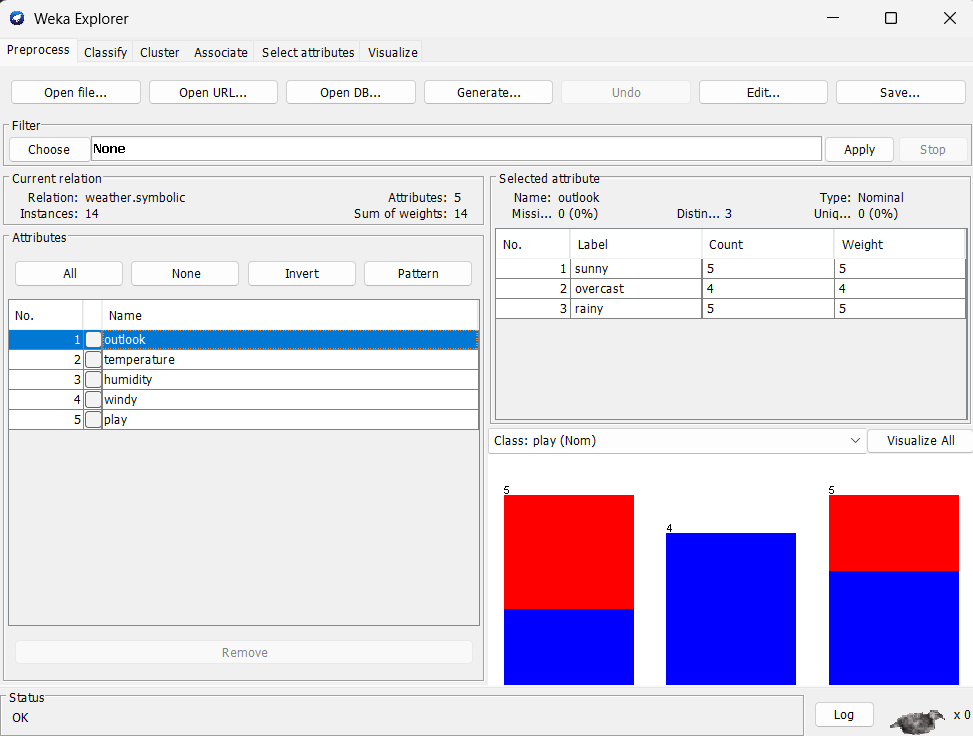

<br>

#### ii) Visualize all Data

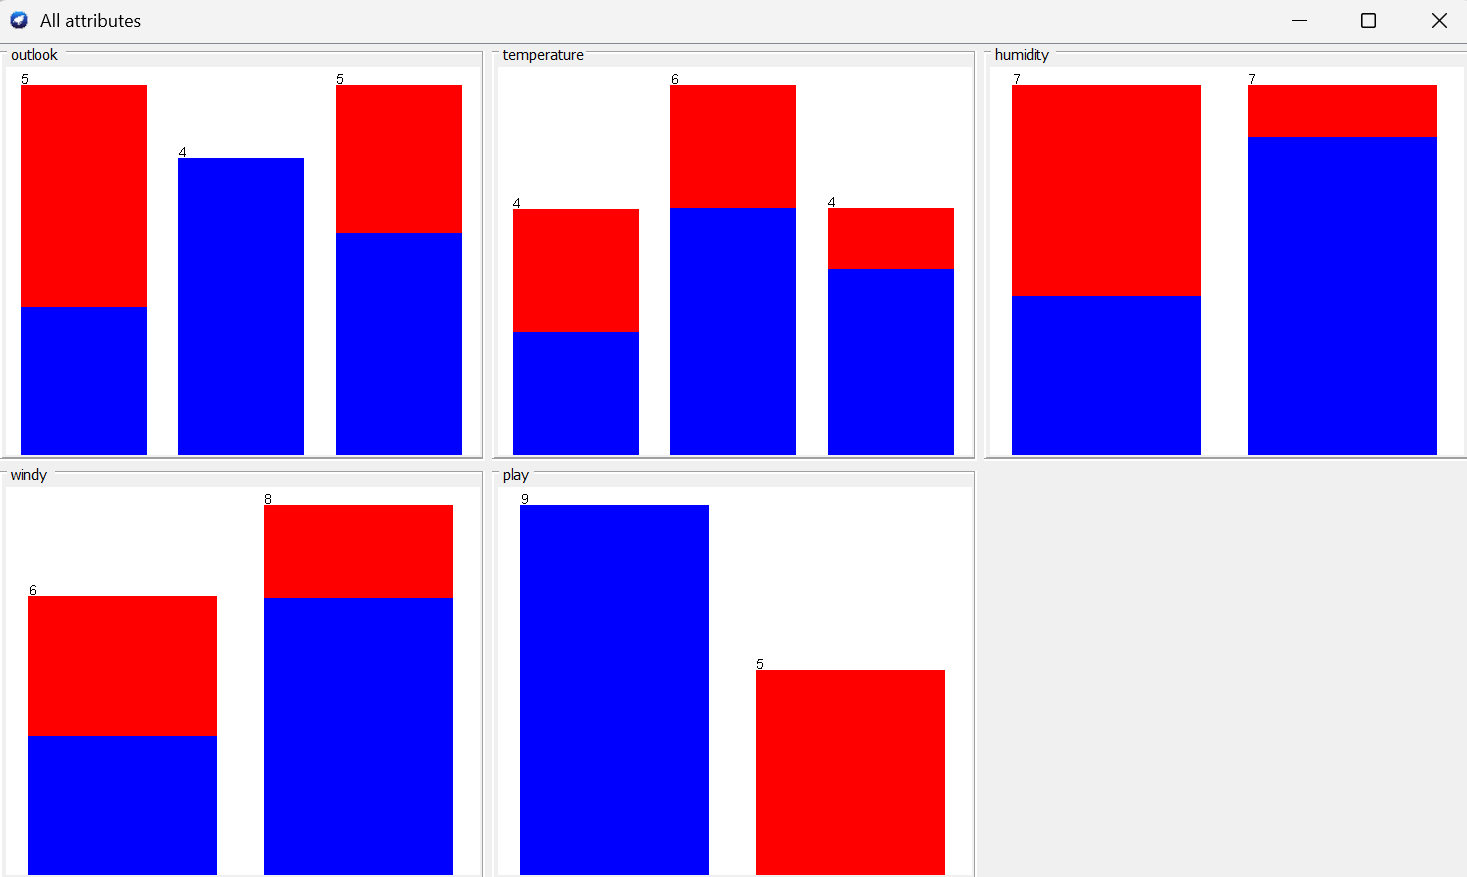

<br>

#### iii) Visualize all Data Weather Dataset Analysis

**1. Outlook (Most Discriminatory)**

Overcast: 100% play (4/4) - Perfect predictor

Rainy: 60% play (3/5)

Sunny: 40% play (2/5)

Why: Pure class separation for overcast conditions creates a perfect decision rule.

<br>

**2. Humidity (Second Most Discriminatory)**

Normal: 86% play (6/7) - Nearly perfect

High: 43% play (3/7)

Why: Large 43% difference between categories, binary nature creates clean split.

<br>

**3. Temperature (Moderate)**

Cool: 75% play (3/4)

Mild: 67% play (4/6)

Hot: 50% play (2/4)

Why: Shows gradual trend but smaller differences between categories.

<br>

**4. Windy (Least Discriminatory)**

False: 75% play (6/8)

True: 50% play (3/6)

Why: Smallest difference between categories, less predictive power.

<br>

**Answer: Outlook provides perfect discrimination for overcast conditions**


---

### **Question 4: J48 Decision Tree Analysis**

#### **J48**
J48 is WEKA's implementation of the C4.5 decision tree algorithm that builds classification trees by splitting data based on attributes that best separate classes. Each internal node represents a decision based on an attribute, and each leaf node represents a final classification (yes/no in this case).

#### **minNumObj**
- **minNumObj** = minimum number of instances required in each leaf node
- It's a **pruning parameter** that prevents overfitting
- If a split would create a leaf with fewer instances than minNumObj, that split is not allowed
- Default value = 2 (each leaf must have at least 2 instances)

#### **Question A: J48 with Training Set vs Cross-Validation**

Run J48 with "Use the training set'', and analyze the resulting decision tree. Specifically, trace the computations and changes in class at each node down the different paths in the Decision Tree. Now run J48 with Cross-validation (10 folds). 

**Answer:**

**Why the Decision Tree contains all data:**
- WEKA builds **two separate things**:
  1. **Display Tree**: Built using ALL 14 instances (what you see)
  2. **Evaluation**: Uses 10-fold cross-validation for accuracy testing
- The tree shown is trained on the complete dataset, but the accuracy comes from cross-validation

**Decision Tree Structure:**
```
outlook = sunny
|   humidity = high: no (3.0)
|   humidity = normal: yes (2.0)
outlook = overcast: yes (4.0)
outlook = rainy
|   windy = TRUE: no (2.0)
|   windy = FALSE: yes (3.0)
```

**Summary Values Meaning:**
- **50% Accuracy**: Poor performance from cross-validation (essentially random)
- **Kappa = -0.0426**: Negative value means worse than random guessing
- The displayed tree accuracy ≠ reported accuracy
- **Cross-validation accuracy is the better predictor** for unseen data

<br>

#### **Question B: Changing minNumObj Parameter**

If you left-click on the panel next to Choose, you will reveal a list of options. Among them, consider minNumObj, which defines the minimum number of objects in a leaf node (=2 by default). What happens when you change minNumObj to 3. Why?

- **minNumObj = 2** (default): Complex tree with 5 leaves, 8 nodes
- **minNumObj = 3**: Simple tree with 1 leaf, 1 node

**Result with minNumObj = 3:**
```
: yes (14.0/5.0)
```
- **The decision tree cannot be built** with meaningful splits
- **Defaults to majority class** ("yes") for all predictions
- 14 total instances, 5 misclassified (the "no" instances)

**Why this happens:**
- minNumObj = 3 requires each leaf to have at least 3 instances
- Original tree had leaves with only 2 instances
- No valid splits possible → falls back to majority class predictor
- **Both versions get 50% accuracy** but for different reasons:
  - minNumObj = 2: Overfitting (too complex)
  - minNumObj = 3: Underfitting (too simple)

<br>

#### **Question C: Calculate Information Gain**

Calculate manually the Information Gain of splitting on humidity in level~1 of the tree. Compare this Information Gain with that obtained for wind and outlook.

Information Gain measures how much information an attribute provides about the class. It's calculated as the reduction in entropy (uncertainty) after splitting on an attribute.

**Base Formulas:**
$$IG(S, A) = H(S) - \sum_{v \in Values(A)} Pr(S_v) \times H(S_v)$$

$$H(S) = -\sum_{i=1}^{c} p_i \log_2 p_i$$

**Given:** Dataset with 14 instances, Base entropy $H(S) = 0.94$

##### Step 1: Information Gain Formula for Humidity
$$IG(S, humidity) = H(S) - [Pr(S_{high}) \times H(S_{high}) + Pr(S_{normal}) \times H(S_{normal})]$$

$$= H(S) - [\frac{7}{14} \times H(S_{high}) + \frac{7}{14} \times H(S_{normal})]$$

##### Step 2: Calculate Entropy for High Humidity
Using the entropy formula: $H(S) = -\sum_{i=1}^{c} p_i \log_2 p_i$

$$H(S_{high}) = -\frac{3}{7} \log_2 \frac{3}{7} - \frac{4}{7} \log_2 \frac{4}{7} = \frac{3}{7}(1.22) + \frac{4}{7}(0.807) = 0.984$$

##### Step 3: Calculate Entropy for Normal Humidity  
Using the entropy formula: $H(S) = -\sum_{i=1}^{c} p_i \log_2 p_i$

$$H(S_{normal}) = -\frac{1}{7} \log_2 \frac{1}{7} - \frac{6}{7} \log_2 \frac{6}{7} = \frac{1}{7}(2.807) + \frac{6}{7}(0.222) = 0.591$$

##### Step 4: Final Information Gain for Humidity
$$IG(S, humidity) = 0.94 - [0.5 \times 0.984 + 0.5 \times 0.591] = 0.1525$$

##### **Comparison with Other Attributes**

- $IG(S, outlook) = 0.246$
- $IG(S, wind) = 0.048$

**So, splitting on humidity in level 1 is better than splitting on wind, and worse than splitting on outlook.**

**Detailed Calculation for Outlook (for comparison)**

##### Entropy for each outlook subset:
$$H(S_{sunny}) = -\frac{2}{5} \log_2 \frac{2}{5} - \frac{3}{5} \log_2 \frac{3}{5} = 0.97$$

$$H(S_{overcast}) = 0$$

$$H(S_{rain}) = -\frac{3}{5} \log_2 \frac{3}{5} - \frac{2}{5} \log_2 \frac{2}{5} = 0.97$$

##### Information Gain for Outlook:
$$IG(S, outlook) = 0.94 - [\frac{5}{14} \times 0.97 + \frac{4}{14} \times 0 + \frac{5}{14} \times 0.97]$$

$$= 0.94 - 0.693 = 0.247$$

##### **Results Summary**

| Attribute | Information Gain | Ranking |
|-----------|------------------|---------|
| **Outlook** | 0.247 | 1st (Best) |
| **Humidity** | 0.1525 | 2nd |
| **Wind** | 0.048 | 3rd (Worst) |

The algorithm chooses the attribute with the **highest Information Gain** at each level for the decision tree construction:
- **Level 1**: Outlook is chosen as root (highest IG = 0.247)
- This creates the tree structure we see in J48 output
- Humidity would be the second-best choice for level 1 splitting

<br>

#### **Question D: Adding Invalid Instances**

**New Instances Added:**
```
rainy,boiling,high,TRUE,yes
hot,high,TRUE,yes
```

**What Happens:**
**The files cannot load** due to the following problems:
1. **"boiling" is undefined** in instance 1 - not declared in temperature attribute values
2. **Outlook value is missing** in instance 2 - required attribute value is absent

**Problem 1: Undefined Value "boiling"**
- **Solution**: Add "boiling" to the temperature attribute declaration in the ARFF header
- **Original**: `@attribute temperature {hot, mild, cool}`
- **Fixed**: `@attribute temperature {hot, mild, cool, boiling}`

**Problem 2: Missing Outlook Value**
- **Solution**: Add a valid outlook value to instance 2
- **Original**: `hot,high,TRUE,yes` (missing outlook)
- **Fixed**: `sunny,hot,high,TRUE,yes` (or overcast/rainy)

All attribute values must be **pre-declared** in the ARFF header, and all **required attributes** must have values in each instance.

<br>

#### **Question E: Adding Instances with Missing Values**

### New Instances Added:
```
overcast,mild,?,FALSE,yes
rainy,mild,high,TRUE,yes
rainy,hot,high,TRUE,?
```

**The file loads successfully** because:
- **"?" represents missing values** - a valid ARFF convention
- All declared attribute values are used
- Missing values are handled by WEKA's algorithms

#### **Difference in the Resultant Decision Tree:**

1. **Extra value for humidity**: "?" appears as a possible value
2. **Third class for play**: "?" becomes a possible class outcome
3. **Overall performance is unaffected**: The algorithm handles missing values
4. **Majority class is not clean**: The presence of "?" values affects the purity of predictions and is represented by the Missing (?) (Black bar) - Small portion

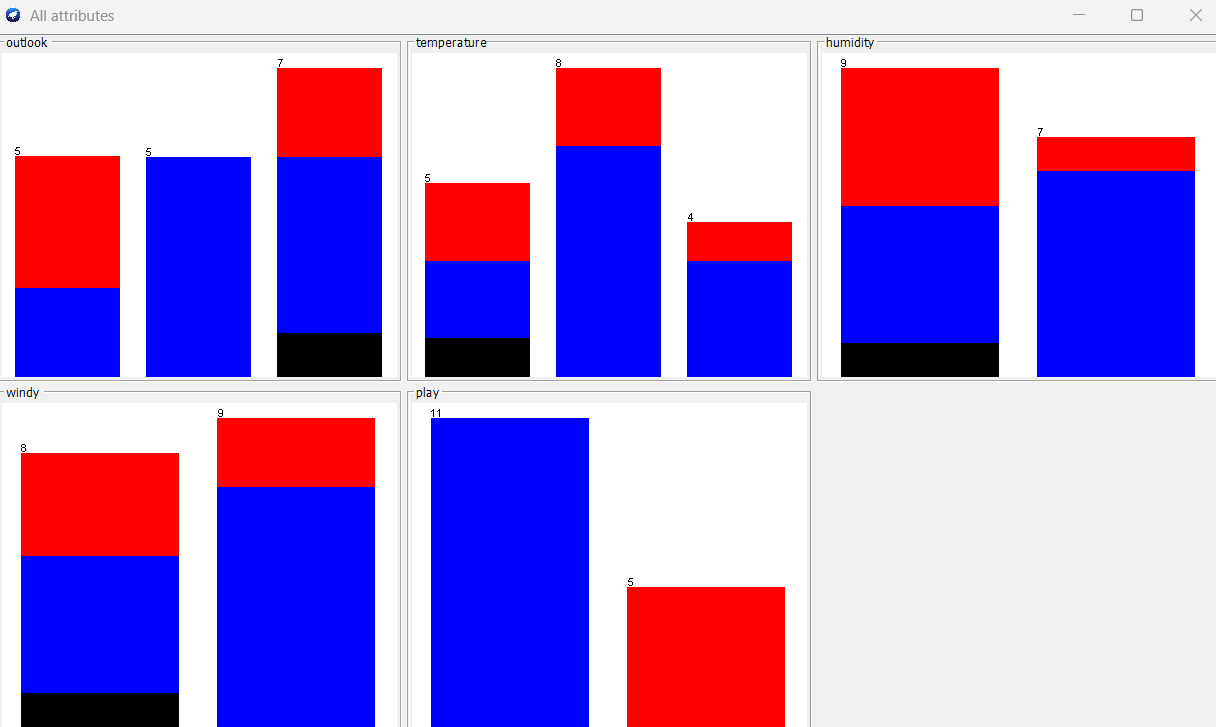

---